# Project: Investigate a Dataset - [tmdb-movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
</ul>

<a id='intro'></a>
## Introduction

## Dataset Description: 

#### This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

<a id='wrangling'></a>
## Data Wrangling

In [2]:
df = pd.read_csv("tmdb-movies.csv")

In [3]:
df.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [4]:
df.tail(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10856,20277,tt0061135,0.140934,0,0,The Ugly Dachshund,Dean Jones|Suzanne Pleshette|Charles Ruggles|K...,NaN,Norman Tokar,A HAPPY HONEYMOON GOES TO THE DOGS!...When a G...,...,The Garrisons (Dean Jones and Suzanne Pleshett...,93,Comedy|Drama|Family,Walt Disney Pictures,2/16/66,14,5.7,1966,0.000000,0.0
10857,5921,tt0060748,0.131378,0,0,Nevada Smith,Steve McQueen|Karl Malden|Brian Keith|Arthur K...,NaN,Henry Hathaway,Some called him savage- and some called him sa...,...,Nevada Smith is the young son of an Indian mot...,128,Action|Western,Paramount Pictures|Solar Productions|Embassy P...,6/10/66,10,5.9,1966,0.000000,0.0
10858,31918,tt0060921,0.317824,0,0,"The Russians Are Coming, The Russians Are Coming",Carl Reiner|Eva Marie Saint|Alan Arkin|Brian K...,NaN,Norman Jewison,IT'S A PLOT! ...to make the world die laughing!!,...,"Without hostile intent, a Soviet sub runs agro...",126,Comedy|War,The Mirisch Corporation,5/25/66,11,5.5,1966,0.000000,0.0
10859,20620,tt0060955,0.089072,0,0,Seconds,Rock Hudson|Salome Jens|John Randolph|Will Gee...,NaN,John Frankenheimer,NaN,...,A secret organisation offers wealthy people a ...,100,Mystery|Science Fiction|Thriller|Drama,Gibraltar Productions|Joel Productions|John Fr...,10/5/66,22,6.6,1966,0.000000,0.0
10860,5060,tt0060214,0.087034,0,0,Carry On Screaming!,Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...,NaN,Gerald Thomas,Carry On Screaming with the Hilarious CARRY ON...,...,The sinister Dr Watt has an evil scheme going....,87,Comedy,Peter Rogers Productions|Anglo-Amalgamated Fil...,5/20/66,13,7.0,1966,0.000000,0.0
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [5]:
df.shape

(10866, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       


### Data Cleaning

In [7]:
# cheack for missing values:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
df.dropna(axis = "index", how = "any", inplace = True)

In [9]:
df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [10]:
#check for duplicated values:

df.duplicated().any()

False

In [11]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [12]:
df.drop(columns = ["imdb_id","tagline","homepage","keywords","overview","release_date","budget_adj",
        "revenue_adj"], inplace = True)

In [13]:
df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'cast',
       'director', 'runtime', 'genres', 'production_companies', 'vote_count',
       'vote_average', 'release_year'],
      dtype='object')

<a id='eda'></a>
## Exploratory Data Analysis

In [14]:
df.describe().round()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,1992.0,1992.0,1992.0,1.992000e+03,1992.0,1992.0,1992.0,1992.0
mean,71652.0,1.0,34549236.0,1.152153e+08,106.0,644.0,6.0,2008.0
std,92356.0,2.0,50618777.0,2.202887e+08,29.0,1092.0,1.0,8.0
min,11.0,0.0,0.0,0.000000e+00,0.0,10.0,2.0,1961.0
25%,9699.0,0.0,0.0,0.000000e+00,92.0,51.0,6.0,2006.0
50%,35112.0,1.0,15000000.0,2.578782e+07,102.0,210.0,6.0,2010.0
75%,83573.0,2.0,48000000.0,1.278787e+08,116.0,688.0,7.0,2012.0
max,414419.0,33.0,425000000.0,2.781506e+09,705.0,9767.0,8.0,2015.0


### Research Question 1 (Display Movies Having Runtime Greater Than or equal to 180 Minutes)

In [15]:
filt = df["runtime"] >= 180

In [16]:
df[filt]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
1235,242754,0.093377,0,0,Klondike,Richard Madden|Abbie Cornish|Sam Shepard|Tim R...,Simon Cellan Jones,285,Drama|History,Scott Free Productions|Discovery Channel|E1 En...,17,6.7,2014
1865,220903,0.102223,0,0,Life,David Attenborough|Oprah Winfrey,Martha Holmes|Simon Blakeney|Stephen Lyle,500,Documentary,British Broadcasting Corporation (BBC),24,7.0,2009
1890,28238,0.086490,0,0,Hamlet,David Tennant|Patrick Stewart|Penny Downie|Oli...,Gregory Doran,185,Drama,NHK Enterprises|Illuminations|BBC Wales,13,6.4,2009
2214,189197,0.757082,120000000,0,The Pacific,James Badge Dale|Joseph Mazzello|Jon Seda|Asht...,Jeremy Podeswa|Tim Van Patten|David Nutter|Gra...,540,War|Drama|Action|Adventure|History,Playtone|HBO|DreamWorks Television,183,7.8,2010
2414,497,2.719461,60000000,284600000,The Green Mile,Tom Hanks|Michael Clarke Duncan|David Morse|Bo...,Frank Darabont,189,Fantasy|Drama|Crime,Castle Rock Entertainment|Darkwoods Production...,2299,8.0,1999
2469,334,0.682531,37000000,48451803,Magnolia,Julianne Moore|William H. Macy|John C. Reilly|...,Paul Thomas Anderson,188,Drama,New Line Cinema|Ghoulardi Film Company|The Mag...,430,7.3,1999
2722,331214,0.537593,0,125000000,Band of Brothers,Damian Lewis|Ron Livingston|Frank John Hughes|...,Phil Alden Robinson|Richard Loncraine|Mikael S...,705,Action|Drama|War,HBO,313,8.0,2001
3759,54293,0.252508,0,0,Zeitgeist: Moving Forward,Robert Sapolsky|GÃ¡bor MÃ¡tÃ©|Richard G. Wilki...,Peter Joseph,201,Documentary,Gentle Machine Productions LLC,39,7.2,2011
3826,414419,0.146477,30000000,0,Kill Bill: The Whole Bloody Affair,Uma Thurman|Lucy Liu|Vivica A. Fox|Daryl Hanna...,Quentin Tarantino,247,Crime|Action,Miramax Films|A Band Apart|Super Cool ManChu,28,8.1,2011
3886,202241,0.044221,20000000,0,Mildred Pierce,Kate Winslet|Evan Rachel Wood|Guy Pearce|Mare ...,Todd Haynes,336,Drama,Home Box Office (HBO)|Metro-Goldwyn-Mayer (MGM),21,6.6,2011


### Research Question 2  ( In Which Year There Was The Highest Average Voting?)

In [17]:
highest_average = df.nlargest(1,"vote_average")
highest_average

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
7269,238,5.738034,6000000,245066411,The Godfather,Marlon Brando|Al Pacino|James Caan|Richard S. ...,Francis Ford Coppola,175,Drama|Crime,Paramount Pictures|Alfran Productions,3970,8.3,1972


### Research Question 3 (In Which Year There Was The Highest  Revenue?)

In [18]:
highest_revenue = df.nlargest(1,"revenue")
highest_revenue

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
1386,19995,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,8458,7.1,2009


### Research Question 4 (What Is The Average Rating For Each Director?)

In [19]:
df.groupby("director")["vote_average"].mean().round().sort_values()

director
Lawrence Kasanoff     2.0
Bob Clark             2.0
Paul Tarnopol         2.0
Jessica Nilsson       2.0
Patrick Rea           3.0
                     ... 
Morten Tyldum         8.0
Giuseppe Tornatore    8.0
Joel Coen             8.0
Richard Marquand      8.0
Malik Bendjelloul     8.0
Name: vote_average, Length: 1340, dtype: float64

### Research Question 5 (Display Top 10 Lengthy Movies Title and Runtime)

In [20]:
top_length = df.nlargest(10,"runtime")

Text(0.5, 0, 'runtime')

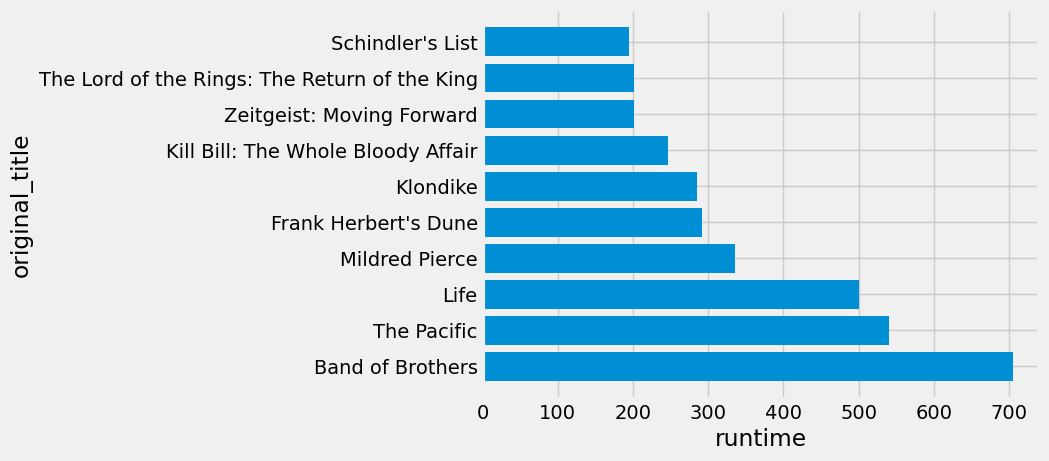

In [21]:
plt.barh(top_length["original_title"] ,top_length["runtime"])

plt.ylabel("original_title")
plt.xlabel("runtime")

### Research Question 6 (Display Number of Movies Per Year)

In [22]:
df["release_year"].value_counts().sort_values(ascending=True)

1969      1
1962      1
1961      1
1972      1
1965      1
1963      1
1970      1
1967      1
1980      2
1974      2
1964      2
1973      2
1976      2
1986      2
1975      3
1991      3
1982      3
1977      3
1978      4
1985      4
1971      4
1988      4
1989      5
1979      5
1984      5
1992      5
1981      6
1990      6
1983      6
1987      8
1994      8
1993     10
1995     10
1997     11
1998     13
1996     15
2001     19
2000     20
1999     24
2002     31
2003     40
2004     48
2005     72
2006     92
2013    128
2007    135
2008    142
2012    145
2014    153
2015    165
2009    192
2010    206
2011    219
Name: release_year, dtype: int64

### Research Question 7 (Find Top 10 Most Popular Movie Title by (Highest Revenue))

In [23]:
most_pop = df.nlargest(10,"revenue")

Text(0, 0.5, 'original_title')

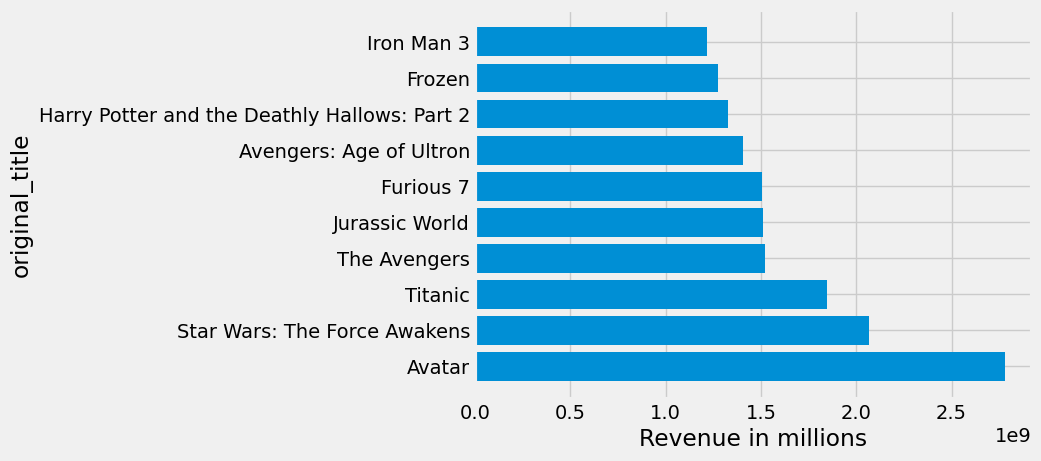

In [24]:
plt.barh(most_pop["original_title"], most_pop["revenue"])

plt.xlabel("Revenue in millions")
plt.ylabel("original_title")

### Research Question 8 (Display Top 10 Highest Rated Movie Titles And its Directors)

In [25]:
most_rates = df.nlargest(10,"vote_average")

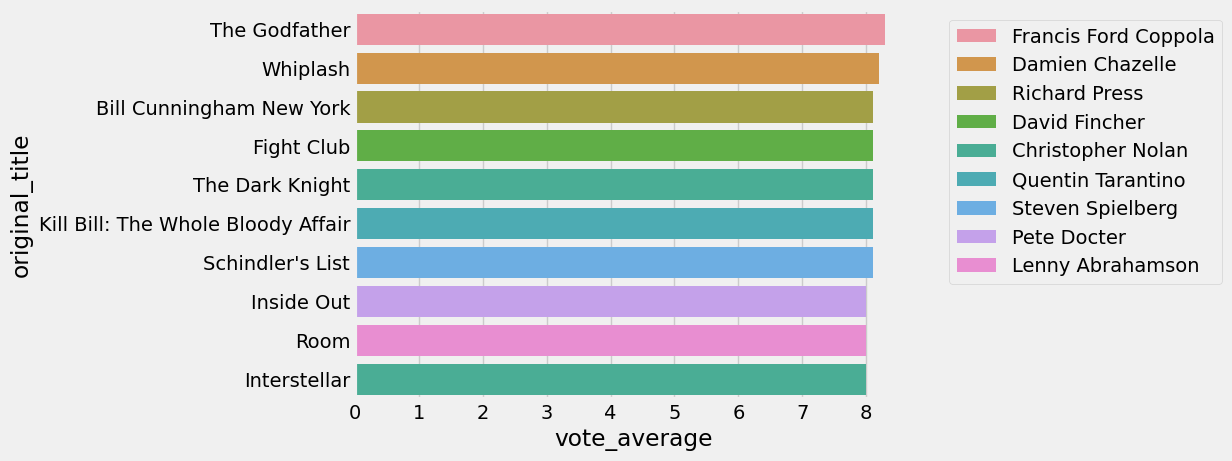

In [26]:
sns.barplot(x= "vote_average", y="original_title", data=most_rates, hue="director", dodge=False)

plt.legend(bbox_to_anchor = (1.05,1),loc=2);

### Research Question 9 (Find Average Rating of Movies Year Wise)

In [27]:
year_grp = df.groupby("release_year")["vote_average"].mean().round()

year_grp

release_year
1961    8.0
1962    7.0
1963    7.0
1964    7.0
1965    6.0
1967    6.0
1969    6.0
1970    6.0
1971    7.0
1972    8.0
1973    7.0
1974    6.0
1975    7.0
1976    7.0
1977    7.0
1978    7.0
1979    7.0
1980    7.0
1981    7.0
1982    7.0
1983    6.0
1984    7.0
1985    7.0
1986    6.0
1987    6.0
1988    6.0
1989    7.0
1990    7.0
1991    7.0
1992    7.0
1993    6.0
1994    6.0
1995    7.0
1996    6.0
1997    6.0
1998    6.0
1999    7.0
2000    6.0
2001    6.0
2002    6.0
2003    6.0
2004    6.0
2005    6.0
2006    6.0
2007    6.0
2008    6.0
2009    6.0
2010    6.0
2011    6.0
2012    6.0
2013    6.0
2014    6.0
2015    6.0
Name: vote_average, dtype: float64

### Research Question 10 (Does Rating Affect The Revenue?)

Text(0, 0.5, 'revenue in millions')

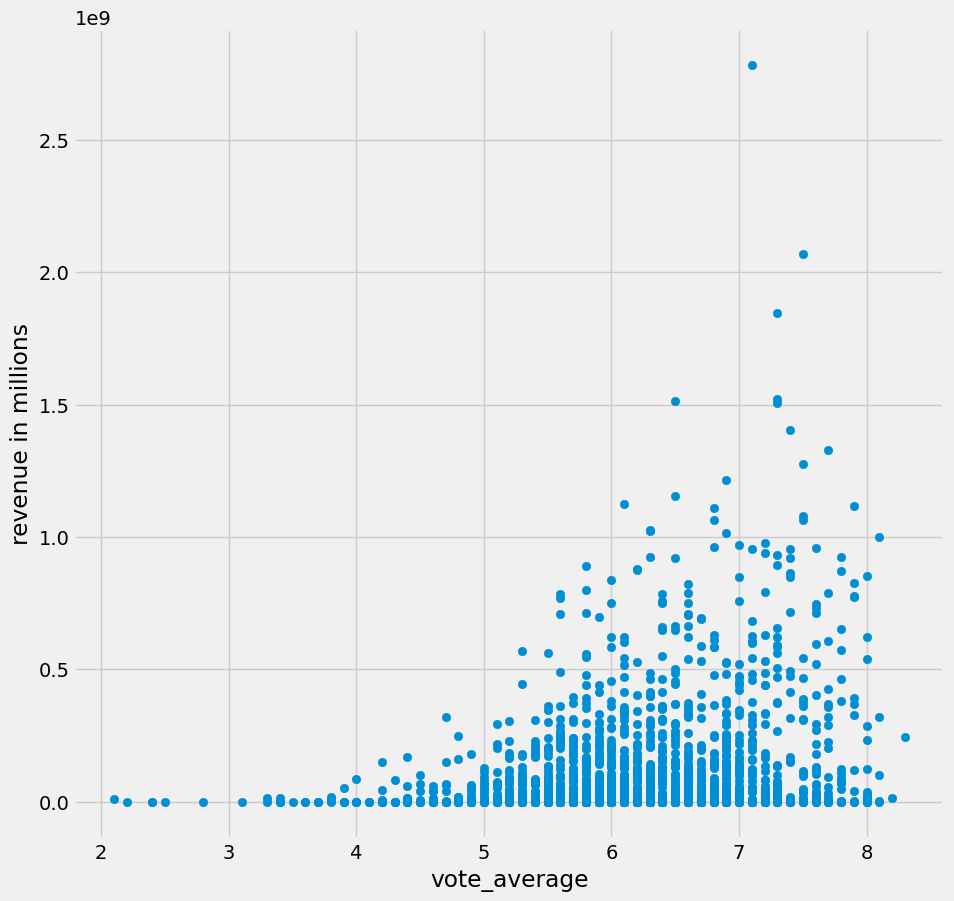

In [28]:
plt.figure(figsize=(10,10))

plt.scatter(df["vote_average"], df["revenue"])

plt.xlabel("vote_average")
plt.ylabel("revenue in millions")

From what we see above, The answer is yes, Rating does affect revenue, When the rating is high the revenue is high, And when the rating is low the revenue is low too.

### Research Question 11 (Count Number of Action Movies?)

In [29]:
action_movie = len(df[df["genres"].str.contains("Action", case=False)])

print("The Count Number of Action Movies is:" ,action_movie)

The Count Number of Action Movies is: 532


### Research Question 12 (How Many Films of Each Genre Were Made?)

In [30]:
df.head(3)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015


In [31]:
df = df.assign(genres=df['genres'].str.split('|')).explode('genres')

In [32]:

df["genres"].value_counts()

Drama              838
Comedy             640
Thriller           575
Action             532
Adventure          361
Science Fiction    291
Romance            291
Horror             273
Crime              262
Family             233
Fantasy            202
Animation          170
Mystery            148
Documentary         93
Music               72
History             56
War                 44
Western             20
TV Movie            16
Foreign              6
Name: genres, dtype: int64

### Research Question 13 (Does Budget affects Average Vote?)

Text(0, 0.5, 'budget in millions')

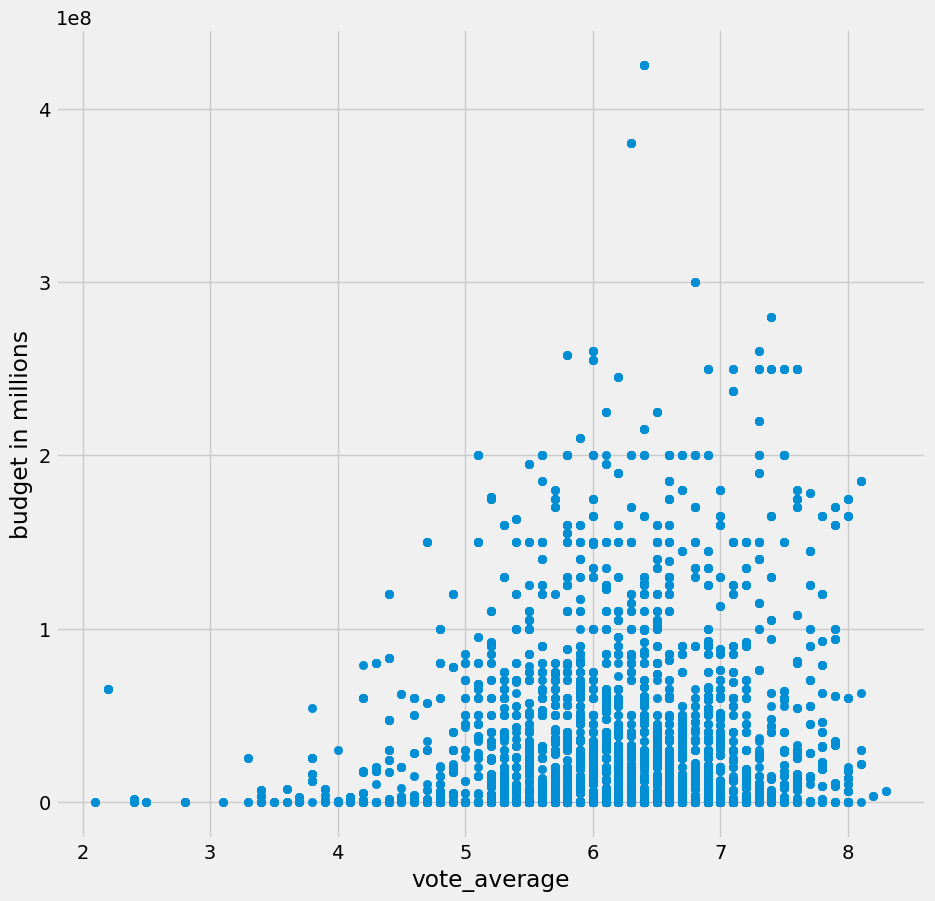

In [33]:
plt.figure(figsize=(10,10))

plt.scatter(df["vote_average"],df["budget"])

plt.xlabel("vote_average")
plt.ylabel("budget in millions")

As We See Above, Budget Does Affect Vote Average, As More Budget Helps To Create Better Movies, Which Increase The Vote Average

### Research Question 14 (What Is The Average Popularity For Each Genre?)

Text(0.5, 0, 'average popularity')

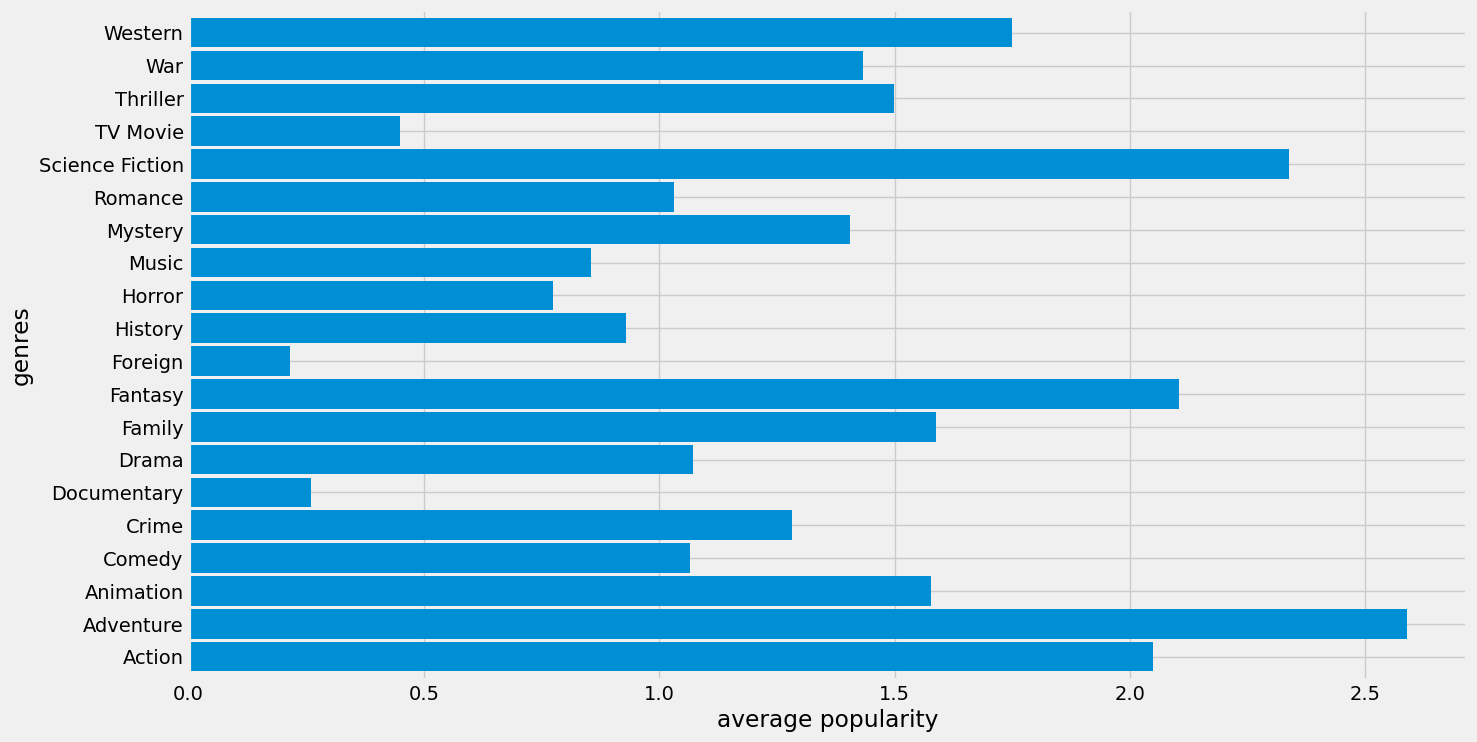

In [34]:
df.groupby("genres").popularity.mean().plot.barh(width=0.9,figsize=[14.70,8.27],rot=0)

plt.xlabel("average popularity")

### Research Question 15 (What Is The Average Vote For Each Genre?)

Text(0.5, 0, 'average popularity')

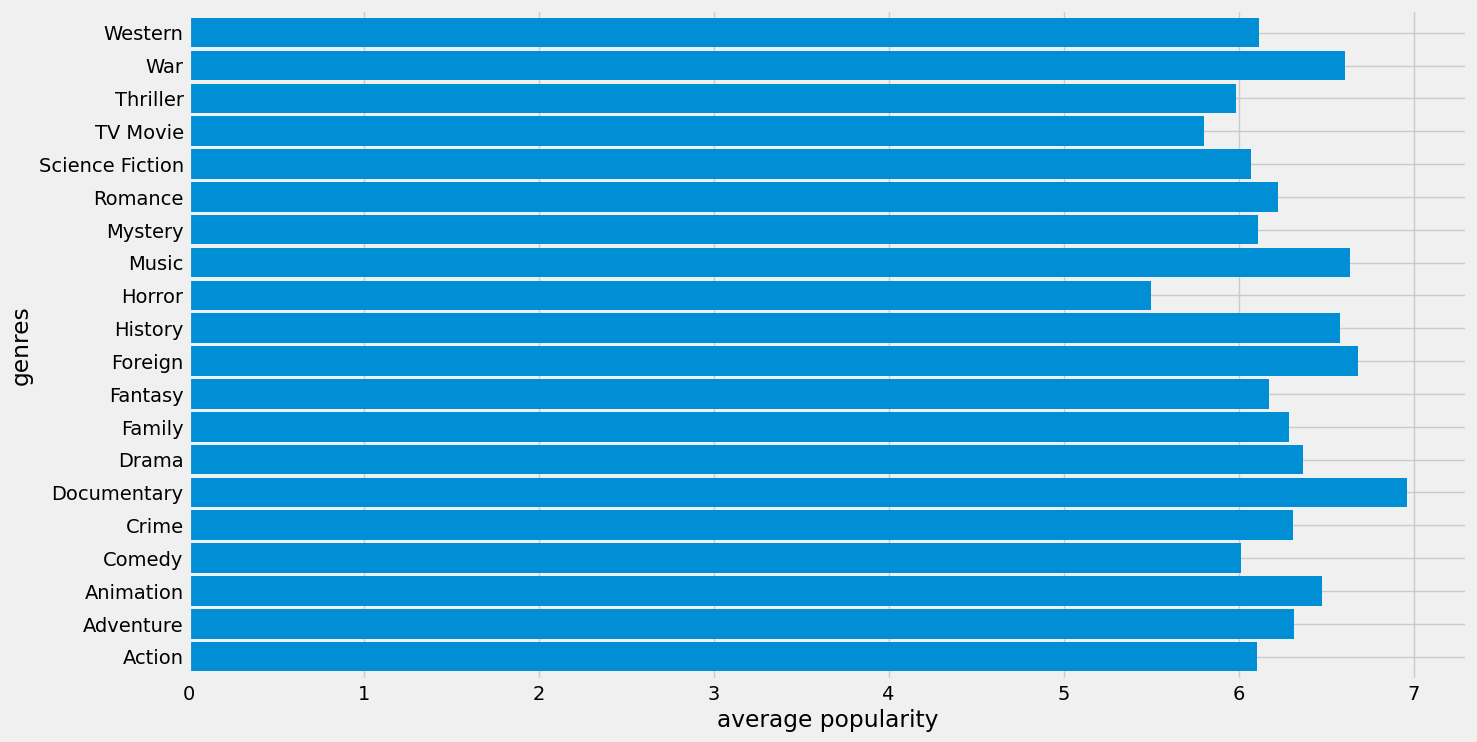

In [35]:
df.groupby("genres").vote_average.mean().plot.barh(width=0.9,figsize=[14.70,8.27],rot=0)

plt.xlabel("average popularity")

### Research Question 15 (Which genres are most popular from year to year?)

In [36]:
year_grp = df.groupby("release_year")

In [37]:
year_grp["genres","popularity"].max()

C:\Users\User\AppData\Local\Temp\ipykernel_5640\1961990929.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  year_grp["genres","popularity"].max()


,genres,popularity
release_year,,
1961,Family,0.303783
1962,Thriller,3.170651
1963,Thriller,2.508235
1964,Thriller,3.153791
1965,Thriller,1.910465
1967,Thriller,1.554808
1969,Thriller,1.778746
1970,Thriller,0.374514
1971,Thriller,1.755117


### Research Question 16 (Does Runtime affects Vote Average?)

<AxesSubplot:xlabel='vote_average', ylabel='runtime'>

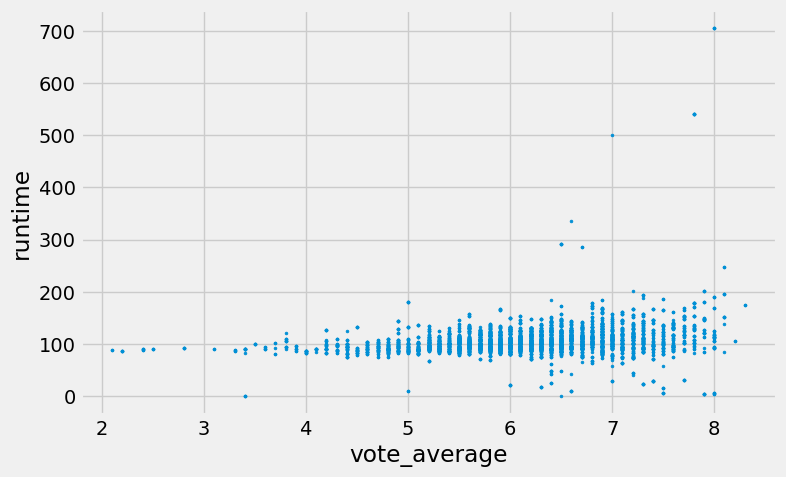

In [38]:
df.plot(kind="scatter", x = "vote_average", y = "runtime", figsize=[8,5],s=4)

AS WE SEE ABOVE, THERE IS NO ANY RELATION BETWEEN VOTE AVERAGE AND RUNTIME, AS ALOT OF MOVIES WITH LOW RUNTIME GOT BETTER AVERAGE THEAN MOVIES WITH A HIGHER RUNTIME